In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

In [11]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1, random_state=0)

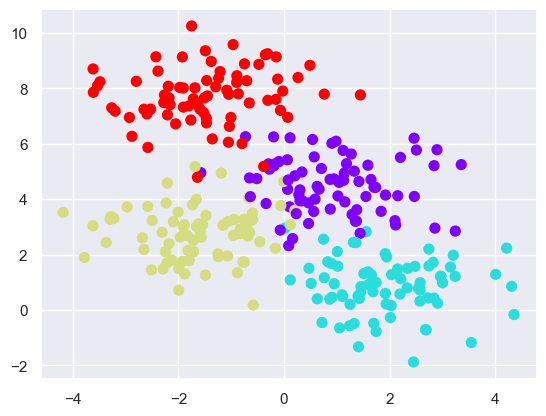

In [13]:
plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap='rainbow')

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [15]:
tree

DecisionTreeClassifier()

In [20]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    
    ax = ax or plt.gca()
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

C:\Users\lakan\AppData\Local\Temp\ipykernel_9312\118311912.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)


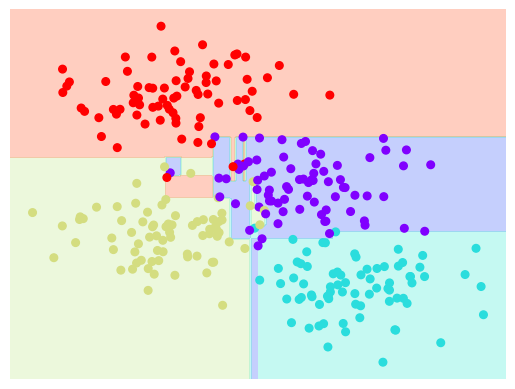

In [21]:
visualize_classifier(DecisionTreeClassifier(), X, y)

C:\Users\lakan\AppData\Local\Temp\ipykernel_9312\118311912.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)


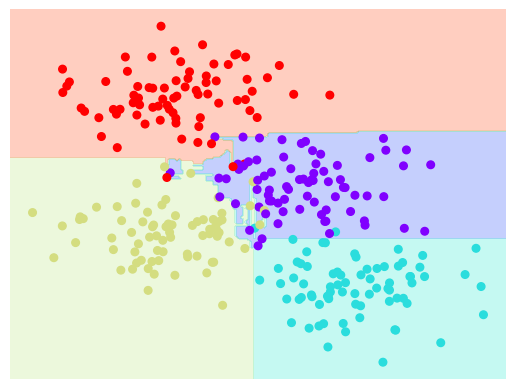

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X,y)
visualize_classifier(bag, X, y)

C:\Users\lakan\AppData\Local\Temp\ipykernel_9312\118311912.py:17: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)


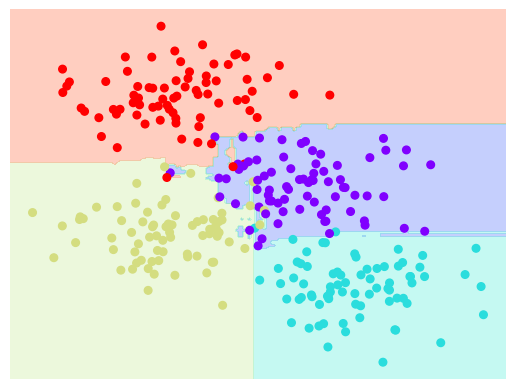

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)